# DeepStock_GooglePriceForecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

## Load the Data

In [2]:
df_train=pd.read_csv("Google_Stock_Price_Train.csv")
df_test=pd.read_csv("Google_Stock_Price_Test.csv")
df_train

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"6,23,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"7,89,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"11,53,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"7,44,300"


In [3]:
df_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [4]:
training_set=df_train.iloc[:,1:2]
training_set.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


## Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
training_set_scaled=mms.fit_transform(training_set)
training_set_scaled.shape

(1258, 1)

In [6]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [7]:
training_set_scaled[2:62,0]

array([0.09433366, 0.09156187, 0.07984225, 0.0643277 , 0.0585423 ,
       0.06568569, 0.06109085, 0.06639259, 0.0614257 , 0.07474514,
       0.02797827, 0.02379269, 0.02409033, 0.0159238 , 0.01078949,
       0.00967334, 0.01642607, 0.02100231, 0.02280676, 0.02273235,
       0.02810849, 0.03212665, 0.0433812 , 0.04475779, 0.04790163,
       0.0440695 , 0.04648783, 0.04745517, 0.04873875, 0.03936305,
       0.04137213, 0.04034898, 0.04784582, 0.04325099, 0.04356723,
       0.04286033, 0.04602277, 0.05398467, 0.05738894, 0.05714711,
       0.05569611, 0.04421832, 0.04514845, 0.04605997, 0.04412531,
       0.03675869, 0.04486941, 0.05065481, 0.05214302, 0.05612397,
       0.05818885, 0.06540665, 0.06882953, 0.07243843, 0.07993526,
       0.07846566, 0.08034452, 0.08497656, 0.08627874, 0.08471612])

## Creating Training Sequences

In [8]:
X_train=[]
y_train=[]

for i in range(60,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

X_train,y_train=np.array(X_train), np.array(y_train)

In [9]:
X_train.shape

(1198, 60)

In [10]:
y_train.shape

(1198,)

## 📌 Example Walkthrough

| **i**  | **X_train (Last 60 Days)**  | **y_train (Next Day's Price)** |
|--------|-----------------------------|--------------------------------|
| 60     | `[Price 0 → Price 59]`      | `Price 60`                     |
| 61     | `[Price 1 → Price 60]`      | `Price 61`                     |
| 62     | `[Price 2 → Price 61]`      | `Price 62`                     |
| ...    | ...                         | ...                            |


In [11]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

LSTMs expect 3D input in the form (samples, timesteps, features).

X_train.shape[0] → Number of training samples (rows).

X_train.shape[1] → Number of timesteps (60 days).

1 → Number of features (since we only use the opening price).

The new shape becomes (number of samples, 60, 1).



## Modelling

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [13]:
es=EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [14]:
model=Sequential()

In [15]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True,))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True,))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=False,))
model.add(Dropout(0.2))

In [16]:
model.add(Dense(units=1))

In [17]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [18]:
model.fit(X_train,y_train,epochs=100,batch_size=32,callbacks=[es])

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.1072
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0065
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0077
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0064
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0054
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0044
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0053
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0050
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0045
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0042
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0042
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0040
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0041
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0045
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - l

## Evaluation

In [19]:
ypred_train=model.predict(X_train)

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step


In [20]:
ypred_train.shape

(1198, 1)

In [21]:
y_train.shape

(1198,)

In [22]:
from sklearn.metrics import mean_squared_error
import math
rmse=math.sqrt(mean_squared_error(y_train,ypred_train))
rmse

0.024156298716216117

## Predictions

In [23]:
real_stock_price=df_test.iloc[:,1:2].values   # .values converts it into a NumPy array.
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [24]:
df_total=pd.concat((df_train['Open'],df_test['Open']),axis=0)

inputs=df_total[len(df_total)-len(df_test)-60:].values  
inputs=inputs.reshape(-1,1)
inputs=mms.transform(inputs)

X_test=[]

for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0])

X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

predicted_stock_price=model.predict(X_test)
predicted_stock_price=mms.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


The extra 60 rows are included to provide the previous time steps required for LSTM prediction.
Now, inputs contains the past 60 prices before the test set, plus the test set itself.


When you use reshape(-1, 1) , you are asking numpy to reshape your array with 1 column and as many rows as necessary to accommodate the data. This operation will result in a 2D array with a shape (n, 1) , where n is the number of elements in your original array.


In [25]:
predicted_stock_price

array([[782.50885],
       [779.65753],
       [779.877  ],
       [781.17584],
       [784.5014 ],
       [790.4282 ],
       [795.77985],
       [797.87195],
       [798.16656],
       [797.9052 ],
       [797.67413],
       [797.4756 ],
       [797.40765],
       [798.08997],
       [799.1737 ],
       [804.0288 ],
       [811.1038 ],
       [818.611  ],
       [822.5154 ],
       [818.0087 ]], dtype=float32)

## Visualization

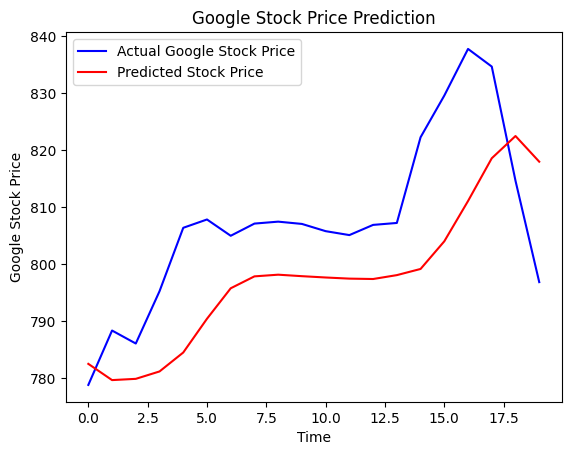

In [26]:
plt.plot(real_stock_price,color='blue',label='Actual Google Stock Price')
plt.plot(predicted_stock_price,color='red',label='Predicted Stock Price')
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

# **Model Summary & Conclusion**

## **📌 Model Performance Overview**
- The LSTM-based model was trained to predict Google stock prices using historical data.
- The **Root Mean Squared Error (RMSE)** achieved: **0.0241562**, indicating a relatively low prediction error.
- The model's predictions closely follow the actual stock prices but still show some deviations.

## **📈 Visual Analysis**
- The plot compares **actual stock prices (blue)** vs. **predicted stock prices (red)**.
- The overall trend is captured well, but slight underestimation and lag are observed in certain regions.
- The model successfully learns stock price movement but struggles slightly with sharp fluctuations.

## **✅ Strengths**
- **Low RMSE** suggests a high degree of accuracy.
- The model captures the general trend of the stock price movement.
- The use of LSTMs effectively models sequential dependencies.
- Model mostly captured the **Trend**.

## **⚠️ Limitations & Areas for Improvement**
- The model slightly underestimates sharp upward spikes.
- Future improvements could include:
  - **Hyperparameter tuning** (e.g., number of LSTM layers, dropout rate).
  - **Feature engineering** (adding volume, technical indicators, etc.).
  - **Using different architectures** (e.g., Bidirectional LSTM, Transformer models).

## **🔮 Final Thoughts**
The model performs well in predicting Google stock prices, as indicated by the low RMSE. However, further optimizations and additional market factors could enhance its predictive power.
